In [2]:
import numpy as np 
import pandas as pd

df = pd.read_csv("Survey on code smells in React with TypeScript - Responses.csv")
df

,Carimbo de data/hora,Select your Country,React experience time,How many projects have you participated in or contributed to that utilized React with TypeScript?,any_type_frequency,non_null_assertions_frequency,missing_union_type_abstraction_frequency,enum_implicit_values_frequency,any_type_negative_impact,non_null_assertions_negative_impact,missing_union_type_abstraction_negative_impact,enum_implicit_values_negative_impact,multiple_booleans_for_state_frequency,props_with_children_pitfall_frequency,multiple_booleans_for_state_negative_impact,props_with_children_pitfall_negative_impact,"Please share your observations, experiences, or any other TypeScript and React smells you have encountered in React projects."
0,25/10/2023 16:10:20,Brazil,Between 1 and 3 years,6 or more projects,Often,Often,Often,Often,Very high,High,High,Moderate,Often,Often,Very low,Very low,NaN
1,26/10/2023 10:16:56,Jamaica,Between 3 and 5 years,3-5 projects,Sometimes,Occasionally,Rare,Often,High,Moderate,Moderate,High,Occasionally,Sometimes,Moderate,Moderate,NaN
2,27/10/2023 14:51:41,Norway,More than 5 years,1-2 projects,Rare,Very rare,Occasionally,Very rare,High,High,Low,Low,Often,Very rare,Very high,Very low,NaN
3,27/10/2023 17:00:38,Germany,Less than 1 year,1-2 projects,Rare,Often,Often,Rare,Very high,Moderate,Very low,Very high,Sometimes,Very rare,Very high,Very high,The non-null assertion is something that i see...
4,28/10/2023 14:51:13,Ukraine,Between 3 and 5 years,6 or more projects,Occasionally,Occasionally,Very rare,Very rare,Very high,High,Moderate,High,Rare,Very rare,Moderate,Moderate,NaN
5,29/10/2023 15:29:57,Cuba,Between 1 and 3 years,3-5 projects,Very rare,Rare,Very rare,Very rare,Very high,Low,Moderate,Low,Sometimes,Rare,High,High,NaN
6,30/10/2023 14:11:36,Brazil,Between 1 and 3 years,6 or more projects,Occasionally,Occasionally,Often,Rare,High,High,Very low,Low,Often,Sometimes,Moderate,Moderate,NaN
7,30/10/2023 18:22:49,Brazil,Between 1 and 3 years,3-5 projects,Occasionally,Rare,Very rare,Very rare,Moderate,Moderate,Moderate,Moderate,Rare,Occasionally,Moderate,High,NaN
8,30/10/2023 18:50:01,Brazil,Between 3 and 5 years,6 or more projects,Sometimes,Rare,Occasionally,Sometimes,Very high,Moderate,Low,Moderate,NaN,NaN,Low,Low,NaN
9,30/10/2023 20:30:36,Brazil,Less than 1 year,3-5 projects,Often,Occasionally,Sometimes,Occasionally,High,Moderate,Moderate,Low,Sometimes,Often,Moderate,Moderate,NaN


In [3]:
df = df.drop('Please share your observations, experiences, or any other TypeScript and React smells you have encountered in React projects.', axis=1)

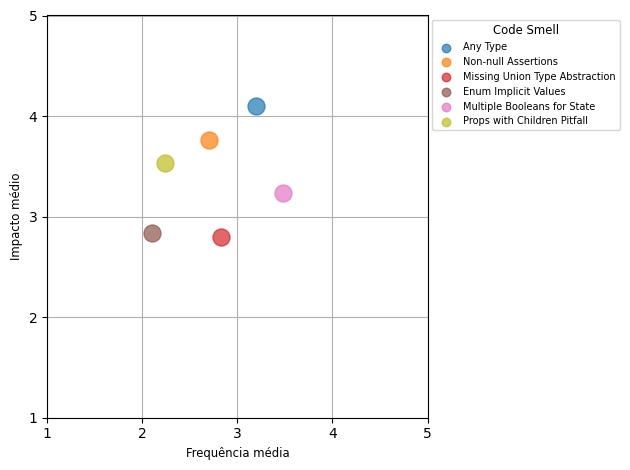

                       Code Smell  Frequency    Impact
0                        any_type   3.200000  4.100000
1             non_null_assertions   2.700000  3.766667
2  missing_union_type_abstraction   2.833333  2.800000
3            enum_implicit_values   2.100000  2.833333
4     multiple_booleans_for_state   3.482759  3.233333
5     props_with_children_pitfall   2.241379  3.533333 

                        Code Smell  Mean Score
0                        any_type    3.650000
4     multiple_booleans_for_state    3.358046
1             non_null_assertions    3.233333
5     props_with_children_pitfall    2.887356
2  missing_union_type_abstraction    2.816667
3            enum_implicit_values    2.466667


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Escalas de conversão
scale_frequency = {'Very rare': 1, 'Rare': 2, 'Occasionally': 3, 'Sometimes': 4, 'Often': 5}
scale_impact = {'Very low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very high': 5}

code_smells = [
    'any_type', 'non_null_assertions', 'missing_union_type_abstraction',
    'enum_implicit_values', 'multiple_booleans_for_state', 'props_with_children_pitfall'
]

# Calculando a média de frequência e impacto para cada code smell
mean_data = []
mean_scores = []
for smell in code_smells:
    frequency = df[f'{smell}_frequency'].map(scale_frequency).mean()
    impact = df[f'{smell}_negative_impact'].map(scale_impact).mean()
    mean_data.append({'Code Smell': smell, 'Frequency': frequency, 'Impact': impact})
    mean_scores.append({'Code Smell': smell, 'Mean Score': (frequency + impact)/2})

# Criando um DataFrame com as médias
mean_df = pd.DataFrame(mean_data)
mean_scores_df = pd.DataFrame(mean_scores)

legend_data = []

for i, smell in enumerate(mean_df['Code Smell']):
    color = plt.cm.tab10(i / float(len(code_smells)))  # Cores variadas para cada smell
    plt.scatter(mean_df.loc[i, 'Frequency'], mean_df.loc[i, 'Impact'], s=150, c=[color], alpha=0.7,
                label=smell)  # Aumentando o tamanho dos pontos

plt.xlabel('Frequência média', fontsize="small")
plt.ylabel('Impacto médio', fontsize="small")
plt.grid(True)
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))

# Adicionando legenda
custom_labels = ['Any Type', 'Non-null Assertions', 'Missing Union Type Abstraction', 'Enum Implicit Values',
                 'Multiple Booleans for State', 'Props with Children Pitfall']
plt.legend(loc='upper left', title='Code Smell', title_fontsize='small', fontsize='7', bbox_to_anchor=(1, 1), labels=custom_labels, scatterpoints=1, markerscale=0.5)
plt.tight_layout()
plt.savefig('scatter_plot.png')

plt.show()
print(mean_df, "\n\n", mean_scores_df.sort_values(by='Mean Score', ascending=False))